<a href="https://colab.research.google.com/github/stutisehgal/MachineLearning/blob/master/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol to predict the quality of the wine.
The task here is to predict the quality of red wine on a scale of 0–10 given a set of features as inputs.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset=pd.read_csv('winequality-red.csv')
X = dataset.iloc[ : , : -1].values # 11 independent features in dataset
y = dataset.iloc[ : , -1].values   # 1 dependent target output in dataset

Handling missing data and encoding categorical values

In [122]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [123]:
dataset.head(10) #to know the column labels

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [124]:
dataset.tail() #to know the total number of elements and entries in each column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [125]:
dataset.shape #to know the no. of rows and columns

(1599, 12)

Correlation matrix between different independent features of the variables matrix X

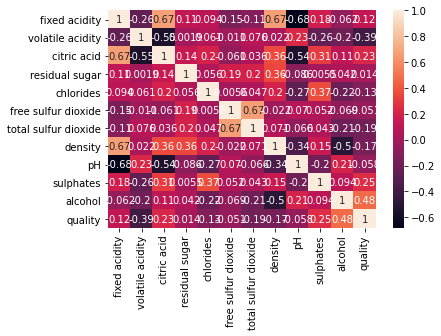

In [126]:
'''X = df.assign(const=1)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)'''
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True) 
#correlation matrix with integer annotation of the values of coefficient
#np.corrcoef


In [127]:
'''correlations = df.corr()['quality'].drop('quality')
print(correlations)'''

"correlations = df.corr()['quality'].drop('quality')\nprint(correlations)"

In [0]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs
    [abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [129]:
# taking features with correlation more than 0.05 as input x and quality as target variable y 
'''features = get_features(0.05) 
print(features) 
x = df[features] 
y = df['quality']
print(X)'''

"features = get_features(0.05) \nprint(features) \nx = df[features] \ny = df['quality']\nprint(X)"

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.2, random_state=0)
y_test # 20% of 1600 entries is 320 so test set will have 320 entries

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler()
X_train = ss_X.fit_transform( X_train )
X_test = ss_X.fit_transform( X_test )
print(X_train)
print(X_test)

[[ 0.90103398  0.05480282  0.9094138  ...  0.52091013 -0.22358408
  -0.95579434]
 [ 1.41998736 -1.47967601  0.9094138  ... -1.16841553 -0.68130963
  -0.76727388]
 [ 0.90103398 -0.98645067  1.4208416  ... -0.3237527   0.74908272
   0.17532846]
 ...
 [-0.25219574  0.21921126  0.19341488 ... -0.12883051  0.17692578
  -0.86153411]
 [ 2.68854005 -0.32881689  1.11398492 ... -0.06385645  0.11971008
   2.15479335]
 [ 0.84337249  2.46612668  0.24455766 ... -0.38872677 -1.0246038
  -0.95579434]]
[[ 1.44653617 -0.29922497  0.8557103  ... -0.93785052  0.72205872
   0.31519731]
 [-0.08433993  1.83333604 -1.39006001 ...  0.28055357 -0.85116573
  -0.79369656]
 [ 0.48265122 -1.39597062  0.33343814 ... -0.36071174  1.26926723
   1.14686771]
 ...
 [ 0.48265122 -1.09131905  0.80348308 ... -0.87372399 -0.7143636
   0.86964424]
 [ 0.48265122  1.49821931 -1.18115114 ... -0.16833214 -0.78276467
  -0.70128874]
 [-0.02764082 -1.21317968  0.80348308 ... -0.29658521 -0.7143636
   1.70131464]]


Apply multiple linear regression model

In [132]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#object of class
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
lr.intercept_

34.998710628721476

In [134]:
coeff_df = pd.DataFrame({'Coefficient':lr.coef_})  
coeff_df

,Coefficient
0,0.041284
1,-1.149528
2,-0.177927
3,0.027870
4,-1.873407
5,0.002684
6,-0.002777
7,-31.516666
8,-0.254486
9,0.924040


This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

Predict test set results

In [135]:
y_pred=lr.predict(X_test)
y_pred

array([5.7829301 , 5.03619267, 6.59698929, 5.33912637, 5.93952898,
       5.0072068 , 5.39616171, 6.05211188, 4.86760343, 4.95067572,
       5.28580441, 5.41265269, 5.7057424 , 5.12921737, 5.52885206,
       6.38052412, 6.81012527, 5.73803346, 5.97618825, 5.08613415,
       6.34479863, 5.16400983, 5.64203971, 6.1462903 , 5.4817802 ,
       5.03391406, 5.18721293, 6.48783659, 5.33301372, 6.30458308,
       6.03452293, 5.82849303, 5.58503524, 5.28512701, 5.75656128,
       6.15273792, 5.14134479, 5.48228021, 6.38983359, 5.7901819 ,
       5.42936928, 6.04810414, 6.70159678, 6.60160183, 5.97253803,
       4.78890763, 5.49565005, 6.01881894, 5.48895041, 6.10824243,
       5.3126164 , 5.28492351, 5.76043226, 6.36081498, 5.7195388 ,
       5.26971928, 5.08498332, 5.31050693, 6.50895816, 5.44323413,
       5.16377401, 5.76427324, 6.0703837 , 6.28933679, 5.07315141,
       6.11874641, 5.35681067, 6.01343647, 6.12184268, 5.98547673,
       5.35327968, 5.4367731 , 5.06017324, 5.58939889, 5.62593

In [136]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
...,...,...
315,6,6.559757
316,4,6.017576
317,5,6.251291
318,4,5.163926


Calculate errors of predicted results

In [137]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)
accuracy = lr.score(X_test, y_test)
print('Accuracy:',accuracy*100)
r_score = r2_score(y_test,y_pred)
print('R2_score:',r_score*100)
mae = mean_absolute_error(y_test, y_pred)
print('Mean squared error:',mae)


Mean squared error: 0.3844711978201226
Accuracy: 32.83887639580253
R2_score: 32.83887639580253
Mean squared error: 0.4696330928661087


You can see that the value of accuracy is 0.38, which is very bad. This means that our algorithm was not very accurate.
There are many factors that may have contributed to this inaccuracy, for example :

Need more data: We need to have a huge amount of data to get the best possible prediction.

Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.